first road step 298
td_init
first road step_after 72
[[[[[[[[[[[[[[[[CHEKC BASIC INFO]]]]]]]]]]]]]]]]
before adding back shortcut,len(myG.inner_facelist) 95
before adding back shortcut,len(myG.interior_parcels) 0
before adding back shortcut,len(myG.road_edges) 226
before adding back shortcut,len(myG.edge_list) 298
before adding back shortcut,len(myG.max_road_num) 72
before adding back shortcut,len(myG.node_list) 204
myG.shortcutEdges 382
[[[[[[[[[[[[[[[[CHEKC BASIC INFO]]]]]]]]]]]]]]]]
after adding back shortcut,len(myG.inner_facelist) 95
after adding back shortcut,len(myG.interior_parcels) 0
after adding back shortcut,len(myG.road_edges) 226
after adding back shortcut,len(myG.edge_list) 680
after adding back shortcut,len(myG.max_road_num) 454
after adding back shortcut,len(myG.node_list) 389
[3.02966, 2.9098, 3.03388, 2.90934, 3.03863, 2.9003, 2.99995, 2.9191, 3.04966, 2.87676, 3.05995, 2.94137, 2.98181, 2.96018, 3.09638, 2.8924, 2.9413, 2.82326, 2.91955, 2.84683, 2.94929, 2.81572, 2.

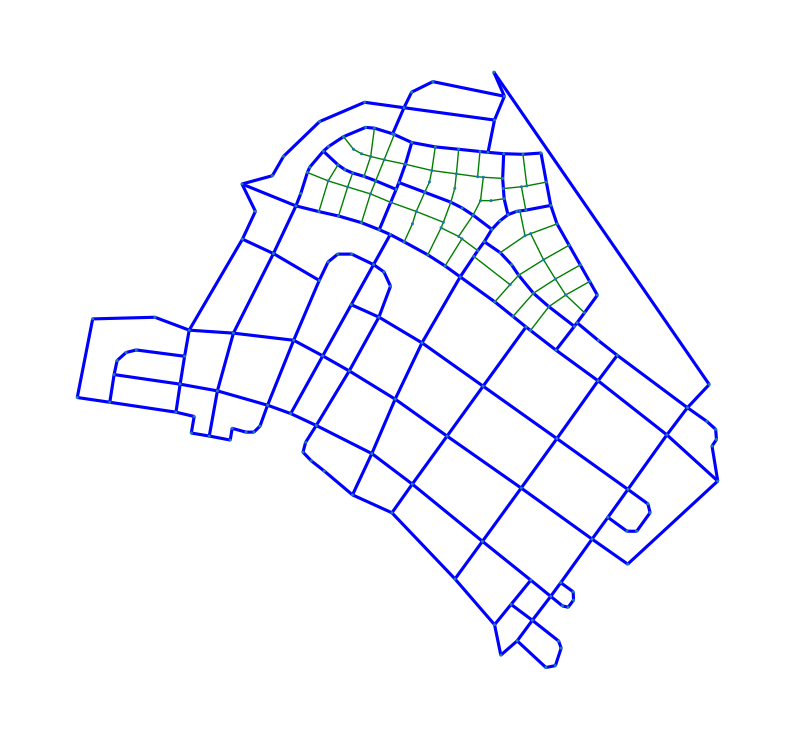

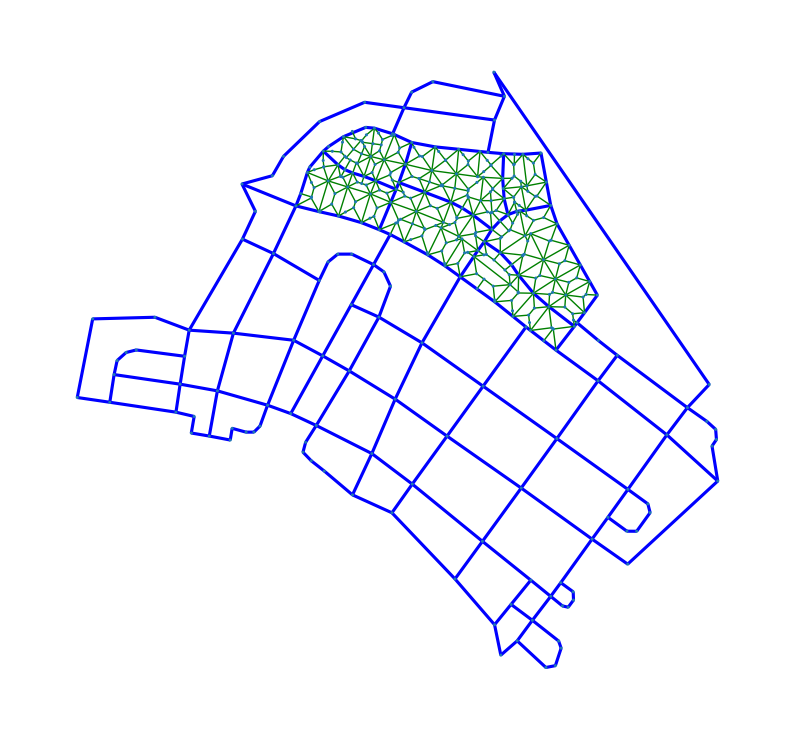

In [12]:
import sys
import os
cwd = os.getcwd()
sys.path.append(cwd) 

sys.path.append("/Users/chenzebin/Documents/GitHub/road-planning-for-slums") 
    
import json
import numpy as np
import pretreatment.my_graph as mg
import pretreatment.my_graph_helpers as mgh
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.collections import LineCollection
import networkx as nx
import itertools
import operator

import copy
import inspect
import time

import DebugAndPreview as DP
########################################
## Main Code
########################################
###### Import
jsonPath = ("/Users/chenzebin/Documents/GitHub/road-planning-for-slums/JSONInput/punggol_1_withShortcut_withConfig.json") 
#jsonPath = r"C:\Users\asdbe\OneDrive\Documents\GitHub\road-planning-for-slums\JSONInput\env1.json"

myG,myNodeDict,myEdgeDict = mgh.GraphFromJSON_Customized_IgnoreShortCut(jsonPath,scaleTag=True,new_min = 0,new_max = 5)   # 5


print ("first road step",  len(myG.myedges()) - len(myG.road_edges))
###### Initialize info
myG.define_roads_FirstTime()                 # Road
myG.define_interior_parcels()                # Interior_Parcels   ， in this case, it is None

myG.plot_roads(parcel_labels=True)
plt.plot()

print ("first road step_after",  len(myG.myedges()) - len(myG.road_edges))
###### Compute

print ("[[[[[[[[[[[[[[[[CHEKC BASIC INFO]]]]]]]]]]]]]]]]")
print ("before adding back shortcut,len(myG.inner_facelist)",len(myG.inner_facelist))
print ("before adding back shortcut,len(myG.interior_parcels)",len(myG.interior_parcels))
print ("before adding back shortcut,len(myG.road_edges)",len(myG.road_edges))
print ("before adding back shortcut,len(myG.edge_list)",len(myG.edge_list))
print ("before adding back shortcut,len(myG.max_road_num)",myG.max_road_num)

print ("before adding back shortcut,len(myG.node_list)",len(myG.node_list))



oldNodeList = [node for node in myG.node_list]


print ("myG.shortcutEdges",len(myG.shortcutEdges))
for edge in myG.shortcutEdges:
    myG.add_edge(edge)

myG.edge_list = myG.myedges()

myG.node_list = []
for n in myG.G.nodes():
    myG.node_list.append(n)

myG.max_road_num = len(myG.edge_list) - len(myG.road_edges)
print ("[[[[[[[[[[[[[[[[CHEKC BASIC INFO]]]]]]]]]]]]]]]]")
print ("after adding back shortcut,len(myG.inner_facelist)",len(myG.inner_facelist))
print ("after adding back shortcut,len(myG.interior_parcels)",len(myG.interior_parcels))
print ("after adding back shortcut,len(myG.road_edges)",len(myG.road_edges))
print ("after adding back shortcut,len(myG.edge_list)",len(myG.edge_list))
print ("after adding back shortcut,len(myG.max_road_num)",myG.max_road_num)

print ("after adding back shortcut,len(myG.node_list)",len(myG.node_list))

newNodeList = [node for node in myG.node_list]

info = []
for node in newNodeList:
    if node not in oldNodeList:
        info.append(node.x)
        info.append(node.y)

print (info)

# Initial feature and property
myG.feature_init()
myG.td_dict_POI_Related_init()


print ("[[[[[[[[[[[[[[[[CHEKC BASIC feature_init]]]]]]]]]]]]]]]]")
print ("self.degree_cen",len(myG.degree_cen.keys()))
print ("self.betweenness_cen",len(myG.betweenness_cen.keys()))
print ("self.eigenvector_cen",len(myG.eigenvector_cen.keys()))
print ("self.closeness_cen",len(myG.closeness_cen.keys()))


print ("self.edge_index",len(myG.edge_index))
print ("self.edge_length",len(myG.edge_length))
print ("self.edge_face_index",len(myG.edge_face_index))
print ("self._cal_graph_node_feature",len(myG.graph_node_feature.keys()))
print ("self.node_degree_total",len(myG.node_degree_total.keys()))
print ("self.node_degree_road",len(myG.node_degree_road.keys()))
print ("self.node_isroad",len(myG.node_isroad.keys()))



myG.plot_roads(parcel_labels=True)
plt.plot()

###### Save this original state to mg
save_dir = "/Users/chenzebin/Documents/GitHub/road-planning-for-slums/data"
#save_dir = r"C:\Users\asdbe\OneDrive\Documents\GitHub\road-planning-for-slums\data"
filename = "punggol_1_withShortcut_withConfig"
DP.SaveGraph_mg(myG,save_dir,filename)




# print (myG.f2POI_avg)


# new_roads_i = mgh.build_all_roads(myG,
#                                 myG, # ??
#                                 alpha=2,
#                                 wholepath=True,
#                                 barriers=False,
#                                 road_max=1,
#                                 plot_intermediate=False,
#                                 strict_greedy=True,
#                                 vquiet=False,
#                                 outsidein=True
#                                 )
# myG.plot_roads(parcel_labels=True)

# myG.td_dict_POI_Related_init()
# print (myG.f2POI_avg)

# print ("second road step",  len(myG.myedges()) - len(myG.road_edges))

In [ ]:

import sys
import os
cwd = os.getcwd()
sys.path.append(cwd) 

sys.path.append("/Users/chenzebin/Documents/GitHub/road-planning-for-slums") 
    
import os
import pickle

# Define the save directory and filename
#save_dir = r'C:\Users\asdbe\OneDrive\Documents\GitHub\road-planning-for-slums\JSONInput'
save_dir = r'/Users/chenzebin/Documents/GitHub/road-planning-for-slums/JSONInput'
filename = 'tempFile'  # replace with your actual filename

# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Save the instance
with open(os.path.join(save_dir, '{}.mg'.format(filename)), 'wb') as mgfile:
    pickle.dump(myG, mgfile)



In [ ]:
import sys
import os
cwd = os.getcwd()
sys.path.append(cwd) 

sys.path.append("/Users/chenzebin/Documents/GitHub/road-planning-for-slums") 
    
    
import json
import numpy as np
import pretreatment.my_graph as mg
import pretreatment.my_graph_helpers as mgh
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.collections import LineCollection
import networkx as nx
import itertools
import operator

import copy
import inspect
import os
import pickle
# Define the save directory and filename
#file_path = r'C:\Users\asdbe\OneDrive\Documents\GitHub\road-planning-for-slums\JSONInput\tempFile.mg'
file_path = '/Users/chenzebin/Documents/GitHub/road-planning-for-slums/JSONInput/tempFile.mg'
# Read the data
with open(file_path, 'rb') as mgfile:
    myG = pickle.load(mgfile)

In [ ]:
##################
###### Get Road balances
##################
total_road_steps = len(myG.myedges()) - len(myG.road_edges)
build_ration = 0.5
# max_road_steps = len(myG.road_edges) + build_ration * total_road_steps
allowed_road_steps  = build_ration * total_road_steps - len(myG.road_edges)
print ("allowed_road_steps",allowed_road_steps)

print (myG.face2POI_avg())
print (myG.f2POI_avg)
print (myG.f2POI_avg_min)

# Stage1 
print ()


In [ ]:
##################
###### F2F
##################
# PlotF2FDist(S0,vmin = 0,vmax = 5000)
# optNum = 5
# for i in range(optNum):  
#     bisecting_roads = mgh.bisecting_road(S0)
#     S0.plot_roads(parcel_labels=True)
#     S0.PlotF2FDist(vmin = 0,vmax = 5000)



In [ ]:
import time

##################
###### POI
##################
S0 = copy.deepcopy(myG)

# ################ Loop by iteration ################
# optNum = 1
# time1 = time.time()
# S0.td_dict_POI_Related_init() 
# #S0.PlotF2POIDist()
# time1 = time.time()
# for i in range(optNum): 
#     mgh.bisecting_road_forPOI(S0)
#     S0.td_dict_POI_Related_init() 
#     print (len(S0.road_edges))
#     #S0.plot_roads(parcel_labels=True)
#     #S0.PlotF2POIDist()
# time2= time.time()

# print ("comsumption",time2-time1)

# time1 = time.time()
# S0.td_dict_init()
# time2 = time.time()
# print ("comsumption",time2-time1)

################  Loop by road ration ################
print (len(S0.road_edges))
i= 0
while i < 6:
    S0.td_dict_POI_Related_init() 
    mgh.bisecting_road_forPOI(S0)
    print (len(S0.road_edges))
    S0.plot_roads(parcel_labels=True)
    #S0.PlotF2POIDist()

    plt.show()
    i+=1

In [ ]:
print (S0.f2POI_avg)